In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Iris\Iris_NG_20.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4
0,NaN,NaN,1.4,0.2
1,4.9,NaN,1.4,0.2
2,NaN,3.2,1.3,0.2
3,NaN,NaN,1.5,0.2
4,NaN,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,NaN
146,6.3,2.5,5.0,1.9
147,6.5,3.0,NaN,2.0
148,6.2,3.4,5.4,2.3


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	28
float64		column 2	43
float64		column 3	29
float64		column 4	14


In [4]:
df.describe()

,column 1,column 2,column 3,column 4
count,122.000000,107.000000,121.000000,136.000000
mean,5.839344,3.062617,3.673554,1.180147
std,0.784094,0.394663,1.761286,0.746133
min,4.300000,2.000000,1.100000,0.100000
25%,5.225000,2.800000,1.500000,0.300000
50%,5.800000,3.000000,4.200000,1.300000
75%,6.300000,3.300000,5.000000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<AxesSubplot:>

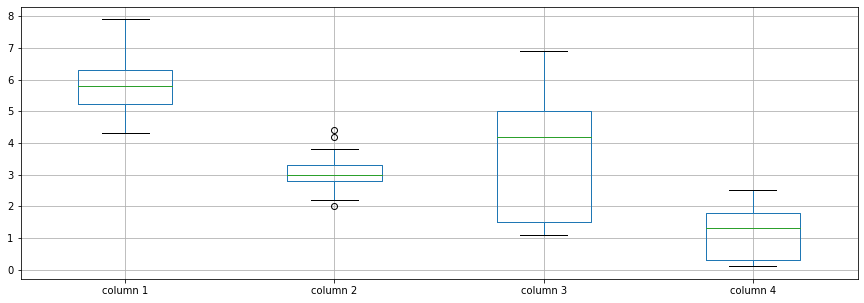

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    5.839344
column 2    3.062617
column 3    3.673554
column 4    1.180147
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4
column 1,1.000000,-0.163458,0.844074,0.816766
column 2,-0.163458,1.000000,-0.347954,-0.330782
column 3,0.844074,-0.347954,1.000000,0.963382
column 4,0.816766,-0.330782,0.963382,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [4,4+44,4+44+44,4+44+44+44,4+44+44+44+44,4+44+44+44,4+44+44,4+44,4], vae_layer = False, seed = 4)
imputer.build_model(df)
imputer.train_model(training_epochs=50)


Size index: [4]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 11.591163317362467
Epoch: 1 , loss: 11.475244416130913
Epoch: 2 , loss: 11.53224097357856
Epoch: 3 , loss: 11.325957086351183
Epoch: 4 , loss: 11.515522638956705
Epoch: 5 , loss: 11.348503006829155
Epoch: 6 , loss: 11.394419458177355
Epoch: 7 , loss: 11.417355961269802
Epoch: 8 , loss: 11.553945965237087
Epoch: 9 , loss: 11.53229406144884
Epoch: 10 , loss: 11.418737517462837
Epoch: 11 , loss: 11.57823912302653
Epoch: 12 , loss: 11.460105260213217
Epoch: 13 , loss: 11.524023797776964
Epoch: 14 , loss: 11.41270817650689
Epoch: 15 , loss: 11.521309640672472
Epoch: 16 , loss: 11.409430609809029
Epoch: 17 , loss: 11.531427595350477
Epoch: 18 , loss: 11.490690549214682
Epoch: 19 , loss: 11.491102430555555
Epoch: 20 , loss: 11.43559741973877
Epoch: 21 , loss: 11.518281724717882
Epoch: 22 , loss: 11.370239893595377
Epoch: 23 , loss: 11.436036003960503
Epoch: 24 , loss: 11.519484943813747
Epoch: 25 , loss: 11.47

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(150, 4)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    0.015384
column 2    3.700000
column 3    1.500000
column 4    0.400000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Iris.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4
0,-5.084204,-3.485145,0.000000,0.000000
1,0.000000,-2.985862,0.000000,0.000000
2,-4.685415,0.000000,0.000000,0.000000
3,-4.584228,-3.085155,0.000000,0.000000
4,-4.985055,0.000000,0.000000,0.000000
...,...,...,...,...
145,0.000000,0.000000,0.000000,-2.285301
146,0.000000,0.000000,0.000000,0.000000
147,0.000000,0.000000,-5.184614,0.000000
148,0.000000,0.000000,0.000000,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(44.713267789378186, 97.653468960401)

In [17]:
NRMS=numerator/denominator
NRMS


0.457876901510889

In [18]:
new_df.iloc[66,:]

column 1    5.6
column 2    3.0
column 3    4.5
column 4    1.5
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4
0,0.015796,0.014855,1.400000,0.200000
1,4.900000,0.014138,1.400000,0.200000
2,0.014585,3.200000,1.300000,0.200000
3,0.015772,0.014845,1.500000,0.200000
4,0.014945,3.600000,1.400000,0.200000
...,...,...,...,...
145,6.700000,3.000000,5.200000,0.014699
146,6.300000,2.500000,5.000000,1.900000
147,6.500000,3.000000,0.015386,2.000000
148,6.200000,3.400000,5.400000,2.300000


In [20]:
imputations[-1].to_excel("Iris_NG_20(imp).xlsx", index=False, header=False)